## Regression modeling

### Linear Regression with cleaned data

#### **Summary**
The fit of the model with the test data results in an R-squared of 0.981. Which is a very high fit to the test data. This also explains the little difference between the mean absolute error of the train and test data.

The residuals (the error) between the real y and the predicted y are also normally distributed, meaning there is little to no signal left in the residuals

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
# train_test_split splits the train and test data by default in the ratio 75% - 25% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

R-squared score test data: 0.981
MAE fitted train data: 0.794
MAE fitted test data: 0.809


Text(0, 0.5, 'Residuals')

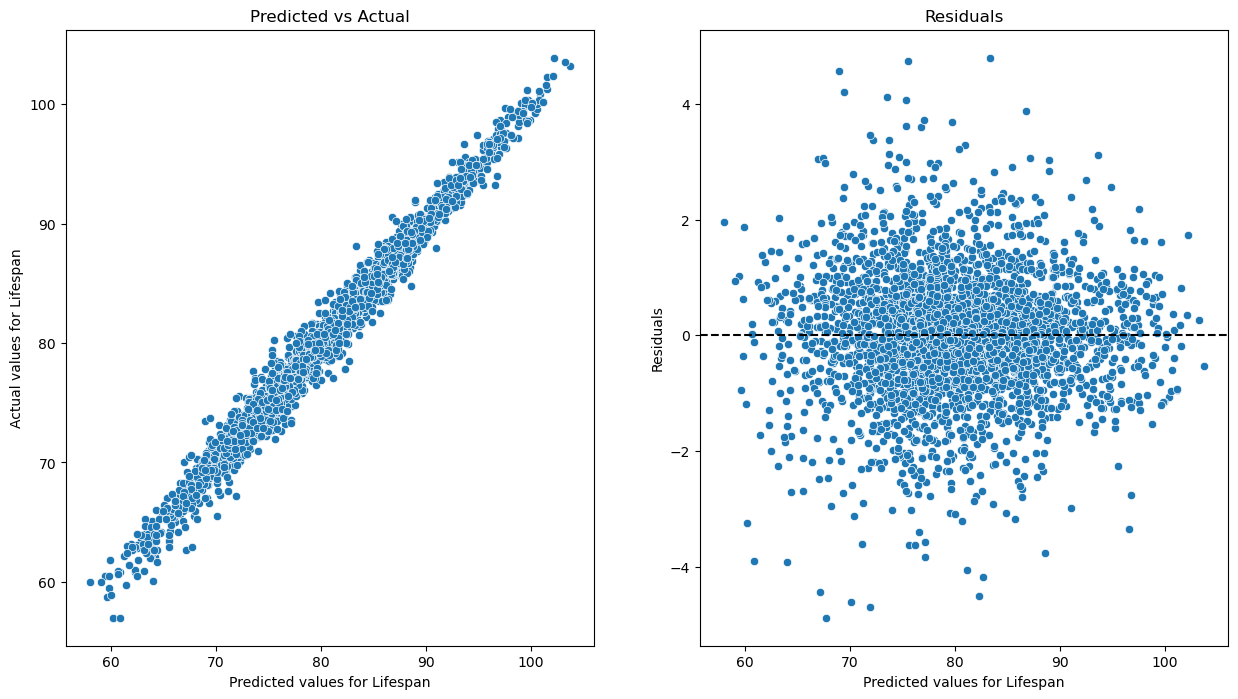

In [17]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe = Pipeline([('model', LinearRegression())])

# Make a fit with the train data
pipe.fit(X_train, y_train)

# make y_train predictions to be able to calculate the residuals
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

# print R-squared of test data and mean absolute error of train and test data
print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

### Linear Regression with cleaned data and outliers removed > 1.5 IQR

#### **Summary**

The dataset with the removed outliers (> 1.5 IQR) shows similar performance with the previous dataset. Therefore I don't see a reason to remove the outliers and I can build a model with the cleaned dataset only.

R-squared score test data: 0.981
MAE fitted train data: 0.792
MAE fitted test data: 0.762


Text(0, 0.5, 'Residuals')

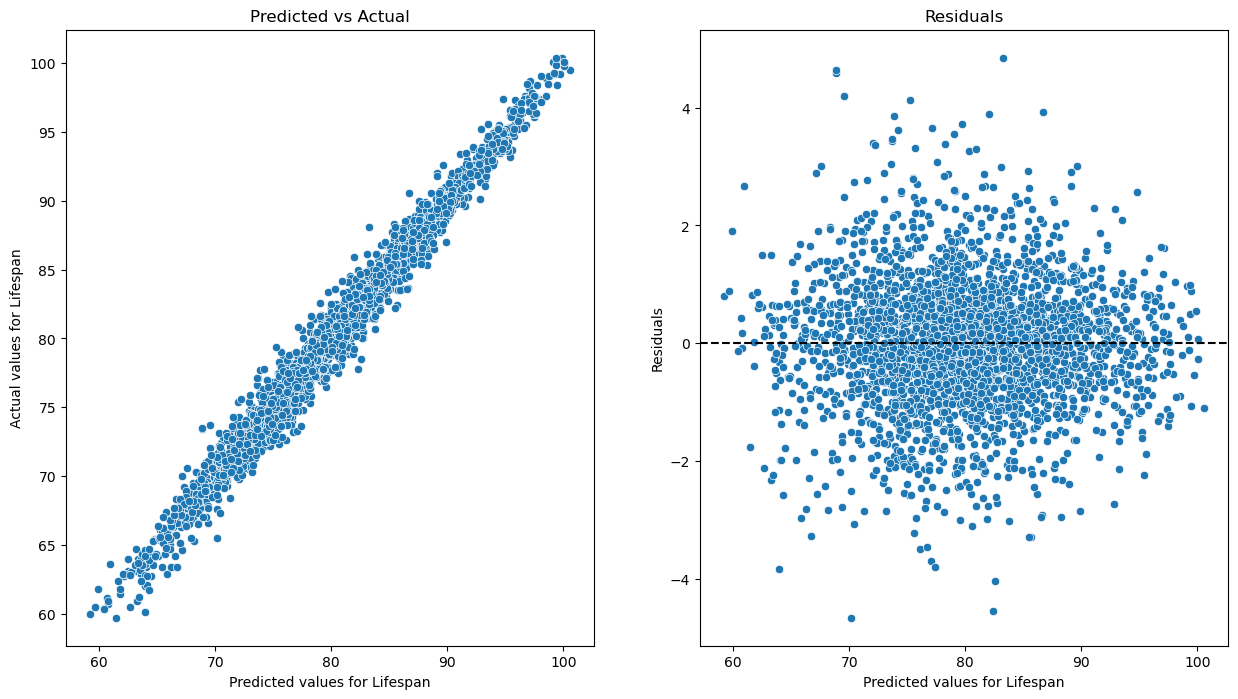

In [18]:
df_iqr_cleaned = pd.read_csv('../data/data_iqr_cleaned.csv')
X = df_iqr_cleaned.iloc[:, :-1]
y = df_iqr_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

# print R-squared of test data and mean absolute error of train and test data
print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

### Linear Regression with PowerTransformer (Yeo-Johnson)

Power transformation can be used to make the variables more normally distributed which could increase the performance of the linear regression model

#### **Summary**
Using the PowerTransform does not result in a better fit of the data. Therefore, I will not be using this PowerTransform going forward.

R-squared score test data: 0.975
MAE fitted train data: 0.912


Text(0, 0.5, 'Residuals')

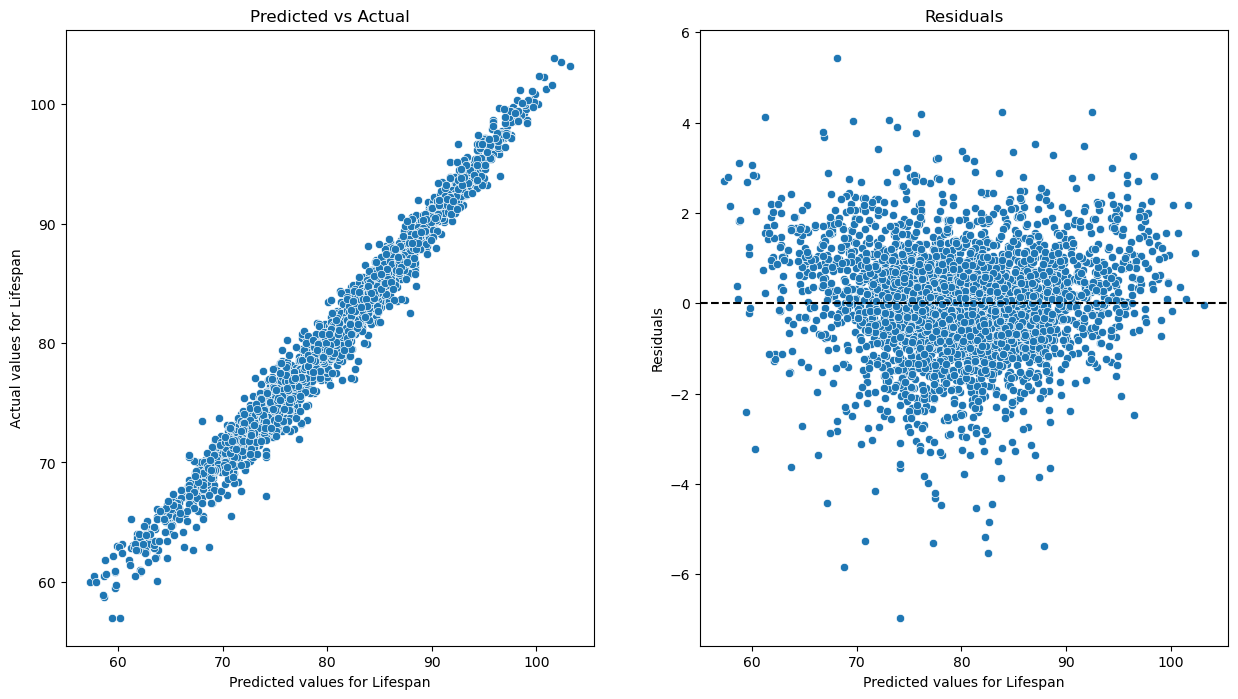

In [4]:
from sklearn.preprocessing import PowerTransformer

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, :-1]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('power', PowerTransformer()), ('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

# print R-squared of test data and mean absolute error of train and test data
print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

### Linear Regression with selective power transforms

#### **Summary**
I created a powerset containing 16383 combinations of features to perform linear regression on.

The following 6 power transformation I have used. They have been chosen based on the best performance on the fit of the model.
* Mass squared
* BMI squared
* Square root of length
* Alcohol squared
* Sugar squared
* Square root of exercise

With the addition of power transforms i could marginally improve my fit on the test data from 0.981 to 0.983.

The parameters chosen for my final model: 'genetic', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar', 'mass_square', 'bmi_square', 'exercise_sqrt'.

In [19]:
from itertools import combinations, chain
from tqdm import tqdm

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
df_cleaned["mass_square"] = df_cleaned['mass']**2
df_cleaned["bmi_square"] = df_cleaned['bmi']**2
df_cleaned["length_sqrt"] = np.power(df_cleaned['length'], 1/2)
df_cleaned["alcohol_square"] = df_cleaned['alcohol']**2
df_cleaned["sugar_square"] = df_cleaned['sugar']**2
df_cleaned["exercise_sqrt"] = np.power(df_cleaned['exercise'], 1/2)

s = list(df_cleaned.loc[:, ~df_cleaned.columns.isin(['lifespan'])].columns)
combi = chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

feature_combinations = list(combi)[1:]
scores = dict()

for features in tqdm(feature_combinations):
    X = df_cleaned.loc[:, df_cleaned.columns.isin(list(features))]
    y = df_cleaned['lifespan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    pipe = Pipeline([('scale', StandardScaler()), ('model', LinearRegression())])
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    # calculate residuals
    residuals = y_train - y_train_pred
    
    scores[pipe.score(X_test, y_test)] = { 'coefficients': {x: y for x, y in zip(features, pipe.named_steps['model'].coef_)},
                                           'r2 train': round(pipe.score(X_train, y_train), 3),
                                           'r2 test': round(pipe.score(X_test, y_test), 3), 
                                           'MAE train': round(mean_absolute_error(y_train, y_train_pred), 3), 
                                           'MAE test': round(mean_absolute_error(y_test, y_test_pred), 3) 
                                         }

dict(sorted(scores.items(), reverse=True))


100%|██████████| 16383/16383 [01:52<00:00, 145.95it/s]


{0.9826184558499818: {'coefficients': {'genetic': 1.0007232370590309,
   'mass': -0.012094739943136146,
   'bmi': 0.20335415545320656,
   'exercise': 0.8991647617587386,
   'smoking': -0.262375948788665,
   'alcohol': -0.24539844061259172,
   'sugar': -0.0752693648140997,
   'bmi_square': -0.0038731638787772,
   'length_sqrt': 0.2917469062831187,
   'alcohol_square': 0.001696254052865562,
   'exercise_sqrt': -0.28794627218507934},
  'r2 train': 0.983,
  'r2 test': 0.983,
  'MAE train': 0.761,
  'MAE test': 0.767},
 0.9826182532331866: {'coefficients': {'genetic': 1.000721237895441,
   'mass': -0.012113463731893153,
   'bmi': 0.2035181736814236,
   'exercise': 0.899154935406159,
   'smoking': -0.26238840154962884,
   'alcohol': -0.2361296767658766,
   'sugar': -0.07528033330080194,
   'bmi_square': -0.0038746709950783454,
   'length_sqrt': 0.2923383678338316,
   'exercise_sqrt': -0.28799524237527513},
  'r2 train': 0.983,
  'r2 test': 0.983,
  'MAE train': 0.761,
  'MAE test': 0.767},
 

### Details of final linear regression model

R-squared score test data: 0.983
MAE fitted train data: 0.761
MAE fitted test data: 0.766


Text(0, 0.5, 'Residuals')

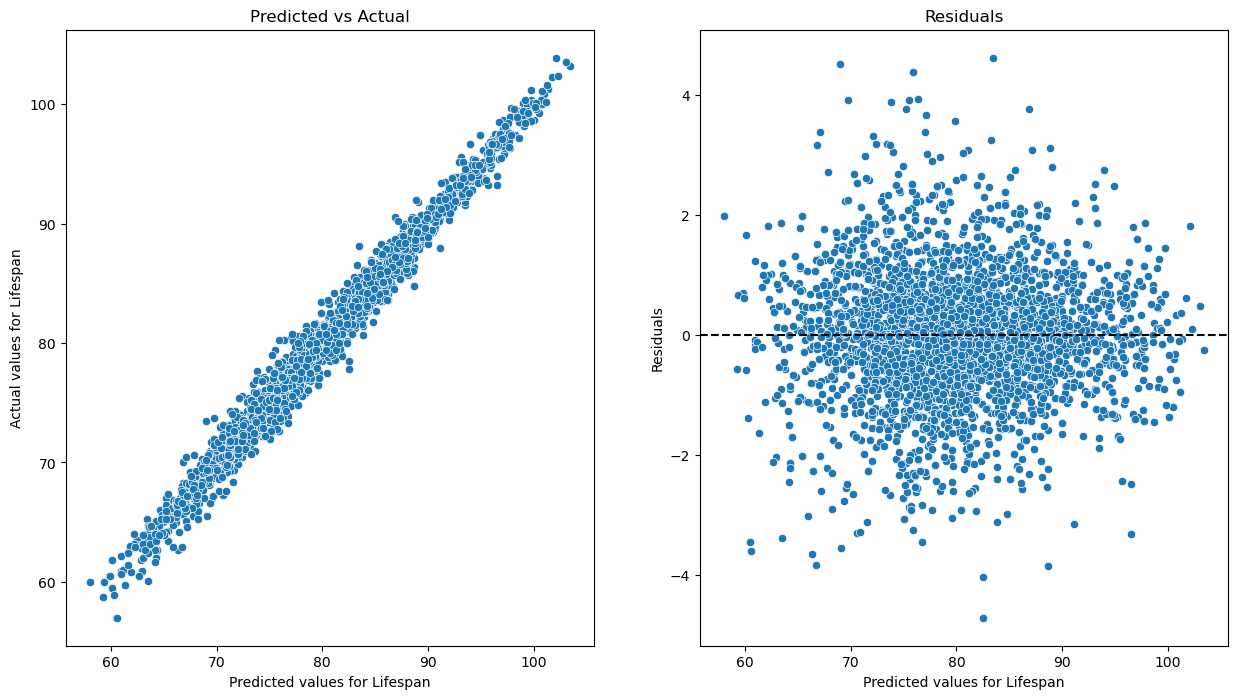

In [24]:

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
df_cleaned["mass_square"] = df_cleaned['mass']**2
df_cleaned["bmi_square"] = df_cleaned['bmi']**2
df_cleaned["exercise_sqrt"] = np.power(df_cleaned['exercise'], 1/2)
X = df_cleaned.iloc[:, df_cleaned.columns.isin(['genetic', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar', 'mass_square', 'bmi_square', 'exercise_sqrt'])]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', LinearRegression())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

# print R-squared of test data and mean absolute error of train and test data
print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

### Saving model to disk with Pickle

In [25]:
# Pickle model
import pickle

# save the model to disk
filename = '../data/finalized_model.pkl'
pickle.dump(pipe, open(filename, 'wb'))
 

## Check other non-linear regression models: Decision Tree and Random Forest

Note: Decision Tree are non-linear in nature. It is however a piecewise linear model: in each neighborhood (defined in a non-linear way), it is linear. In fact, the model is just a local constant.

*Source: https://datascience.stackexchange.com/questions/6787/are-decision-tree-algorithms-linear-or-nonlinear*

### Decision Tree

#### **Summary**
This was a quick and dirty exercise on the use of decision trees in regression modeling

R-squared score test data: 0.951
MAE fitted train data: 0.496
MAE fitted test data: 1.332


Text(0, 0.5, 'Residuals')

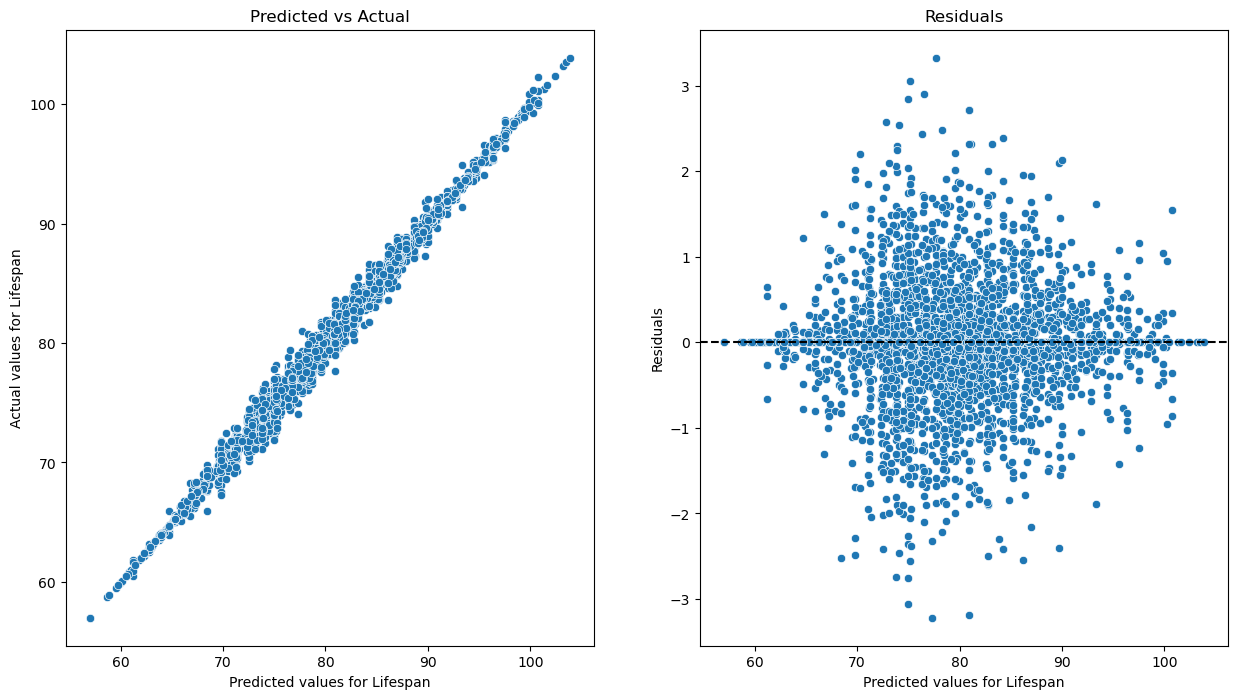

In [22]:
from sklearn import tree

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, df_cleaned.columns.isin(['genetic', 'mass', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar'])]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', tree.DecisionTreeRegressor(max_depth=10))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')

In [9]:
# import export_graphviz
from sklearn.tree import export_graphviz
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(pipe.named_steps['model'], out_file ='tree.dot',
               feature_names =['genetic', 'mass', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar']) 

### Random Forest

#### **Summary**
This was a quick and dirty exercise on the use of random forest in regression modeling

R-squared score test data: 0.974
MAE fitted train data: 0.523
MAE fitted test data: 0.981


Text(0, 0.5, 'Residuals')

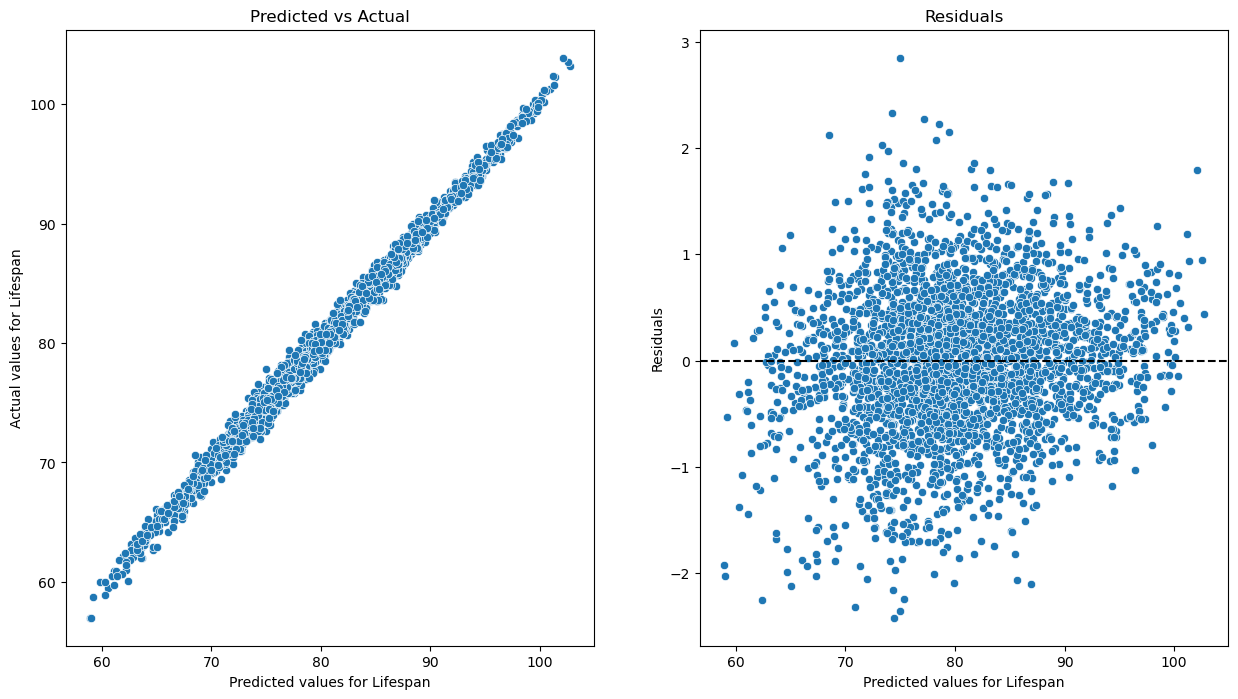

In [10]:
from sklearn.ensemble import RandomForestRegressor

df_cleaned = pd.read_csv('../data/data_cleaned.csv')
X = df_cleaned.iloc[:, df_cleaned.columns.isin(['genetic', 'mass', 'length', 'bmi', 'exercise', 'smoking', 'alcohol', 'sugar'])]
y = df_cleaned['lifespan']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('model', RandomForestRegressor(max_depth=10, max_features=6, random_state=0))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# calculate residuals
residuals = y_train - y_train_pred

print(f"R-squared score test data: {pipe.score(X_test, y_test):.3f}")
print(f"MAE fitted train data: {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"MAE fitted test data: {mean_absolute_error(y_test, y_test_pred):.3f}")

# Plot of predictions and residuals
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.scatterplot(ax=axes[0], x=y_train_pred, y=y_train)
sns.scatterplot(ax=axes[1], x=y_train_pred, y=residuals)

# draw horizontal line through residual 0 with black dashed line
axes[1].axhline(y=0, color='black', ls='--')

# Set labels
axes[0].set_title('Predicted vs Actual')
axes[0].set_xlabel('Predicted values for Lifespan')
axes[0].set_ylabel('Actual values for Lifespan')
axes[1].set_title('Residuals')
axes[1].set_xlabel('Predicted values for Lifespan')
axes[1].set_ylabel('Residuals')